<a href="https://colab.research.google.com/github/Lakshg-git/AI_ML_Projects/blob/main/INN_FoodHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user

   ━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/475.3 MB 59.7 MB/s eta 0:00:07
ERROR: Operation cancelled by user


In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split
from keras.metrics import Recall
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random
import time
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:

url = "/content/drive/My Drive/UTA_AI_ML/Neural_network/bank-1.csv"
bankData = pd.read_csv(url)
df = bankData.copy()


## Data Overview

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [ ]:
# checking duplicate
df.duplicated().sum()
# no duplicate found

0

In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
round(df.isnull().sum() / df.isnull().count() * 100, 2)

,0
RowNumber,0.0
CustomerId,0.0
Surname,0.0
CreditScore,0.0
Geography,0.0
Gender,0.0
Age,0.0
Tenure,0.0
Balance,0.0
NumOfProducts,0.0


In [ ]:
df.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


In [ ]:
for i in df.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 50)

Unique values in Surname are :
Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64
**************************************************
Unique values in Geography are :
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
Male      5457
Female    4543
Name: count, dtype: int64
**************************************************


In [ ]:
#dropping uncessary columns
df = df.drop(['RowNumber', 'CustomerId','Surname'], axis=1)

In [ ]:
# Checking if missing value treatment is required
df.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


No missing value treatment is required

## Exploratory Data Analysis

In [ ]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Univariate Analysis

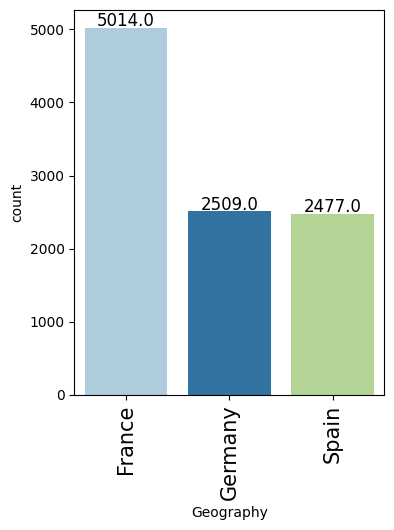

In [ ]:
labeled_barplot(df, 'Geography')

Most customers are from France, followed by Germany and Spain. This might indicate either there is a variation in customers behavior in different regiond or could be because of the market penetration

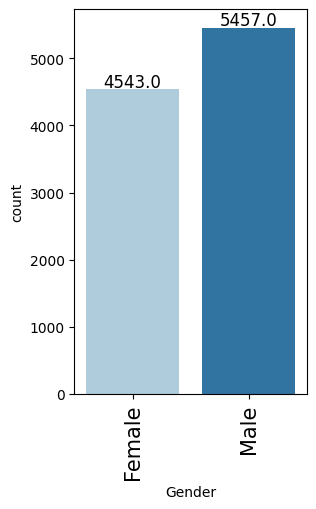

In [ ]:
labeled_barplot(df, 'Gender')

There are more male customers than female customers. There is a need for targeting more female customers as well.

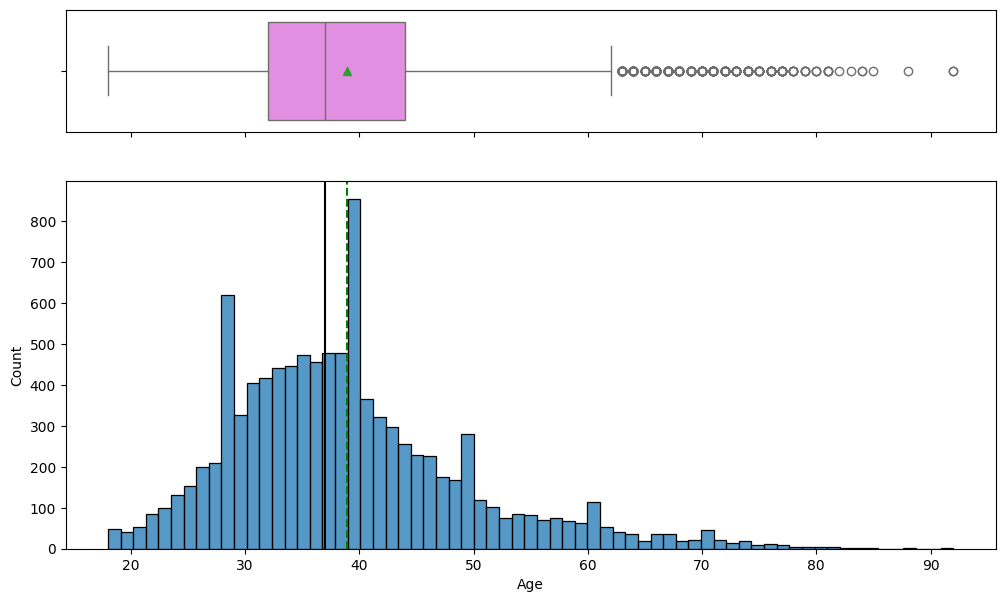

In [ ]:
histogram_boxplot(df, 'Age')

The age distribution is rightly skewed, it looks like younger customers are more inclined towards risk and could also influence product preference.

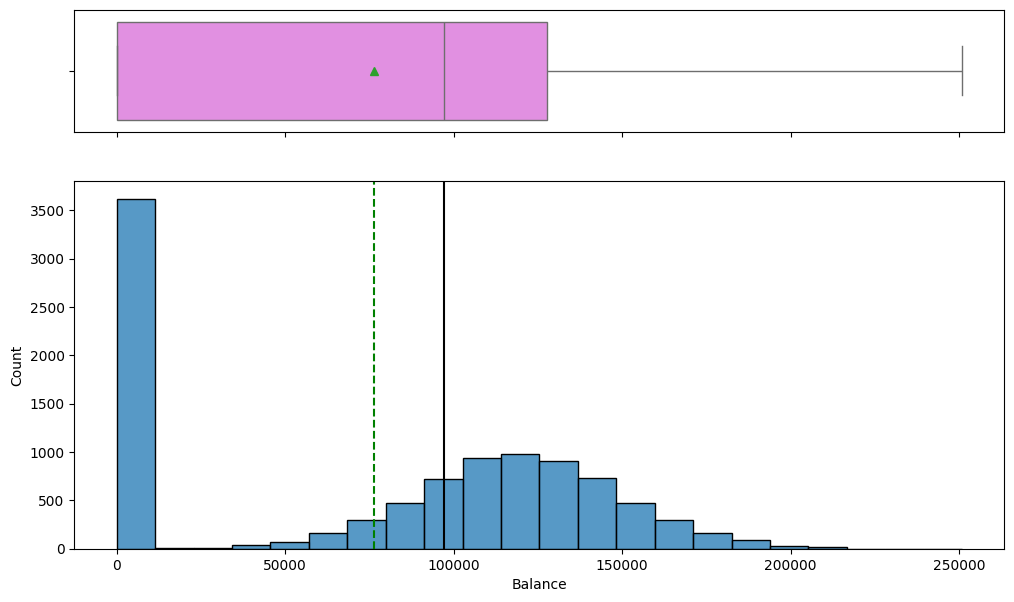

In [ ]:
histogram_boxplot(df, 'Balance')

Many customers have low balance or 0 balance and few have high balance.Analysis has to be done as why these customers have low balace.

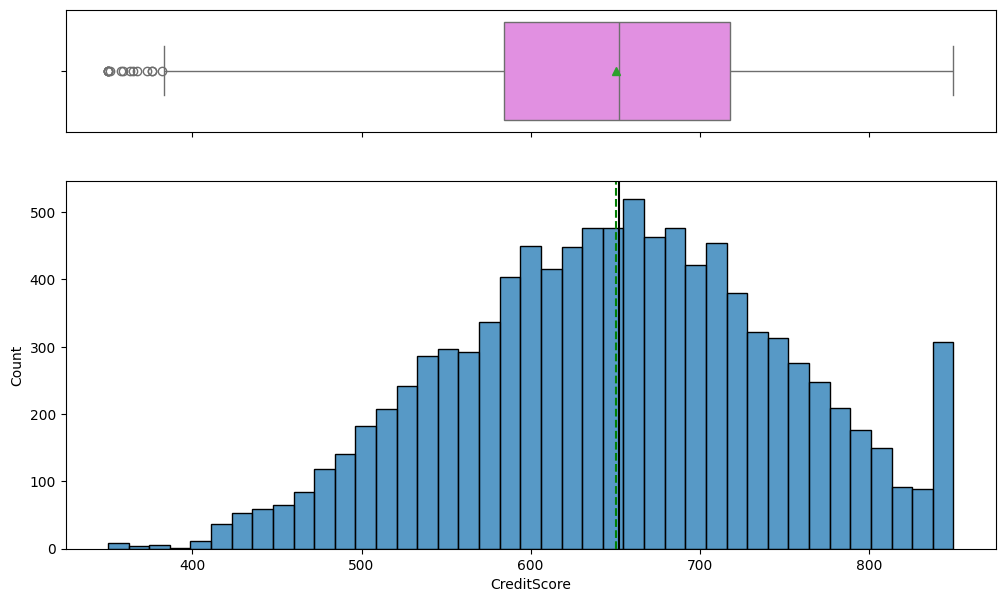

In [ ]:
histogram_boxplot(df,'CreditScore')

Distribution is slightly left skewed. But overall it is expected that the distribution to have most of the customers between 600-700 range


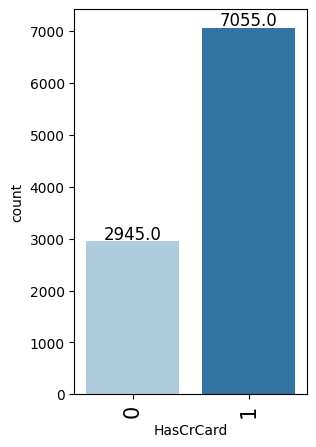

In [ ]:
labeled_barplot(df, 'HasCrCard')

Majority of the customers have credit card. Further investigation is needed to see if the credit card has anything to do with the customer churn.

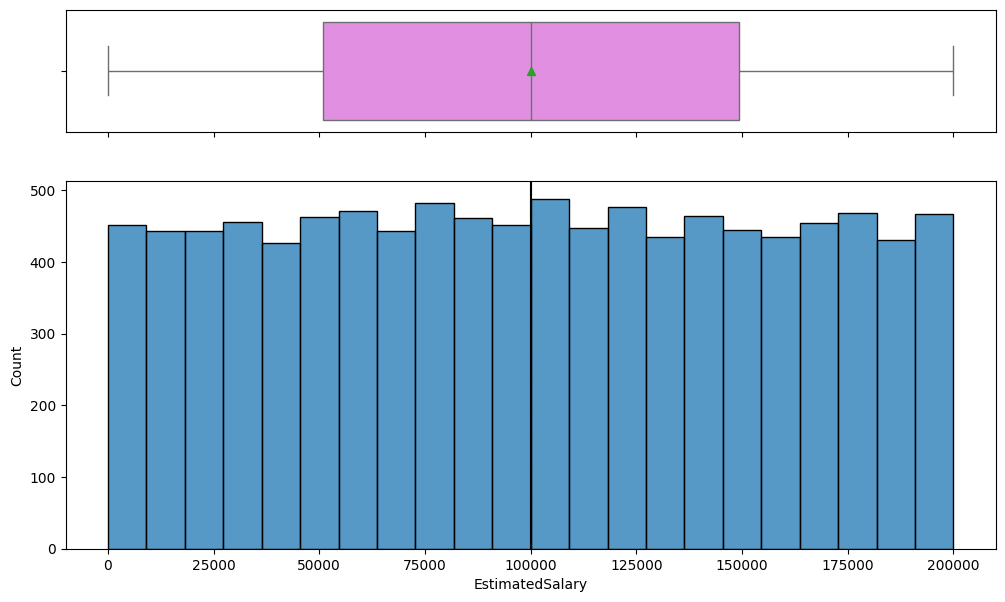

In [ ]:
histogram_boxplot(df,'EstimatedSalary')

The estimated salary seems to be uniformly distributed across the range.

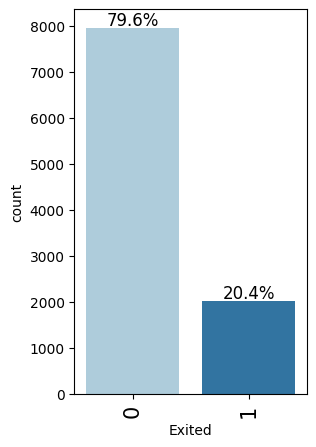

In [ ]:
labeled_barplot(df, "Exited", perc=True)

Around 20 percent of customers have churned. Need further investigation to figure out the factors influencing the customer churn.

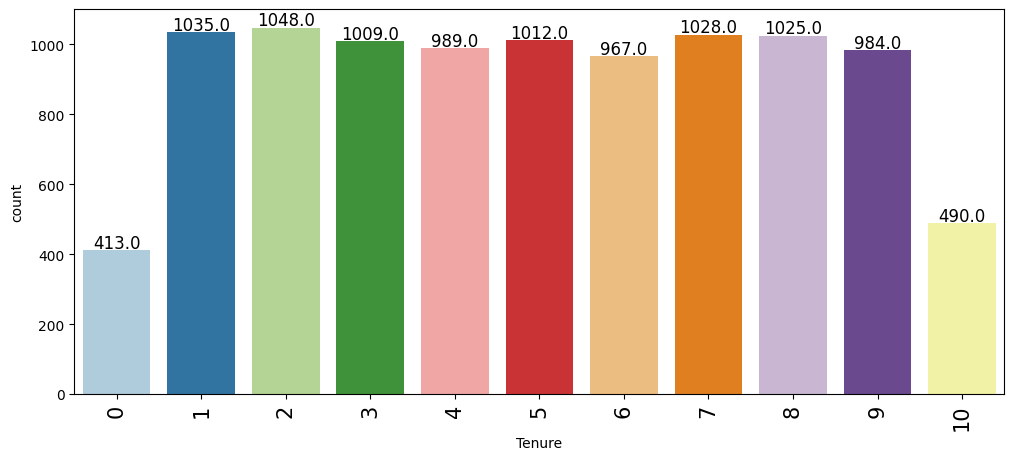

In [ ]:
labeled_barplot(df,"Tenure")

Majority of the tenure are from 1-9

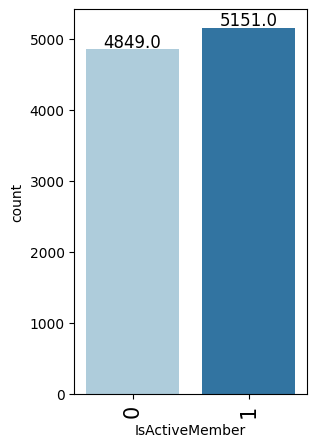

In [ ]:
labeled_barplot(df,"IsActiveMember")

There are less numbers of Active customers. Further investigation is needed to find the relation between active members and customer churn

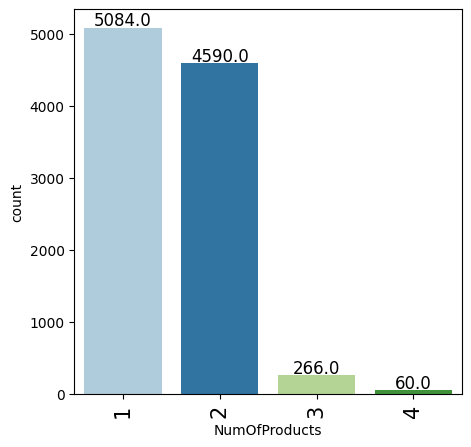

In [ ]:
labeled_barplot(df,"NumOfProducts")

There are more customers with 1 or 2 product usage.

### Bivariate Analysis

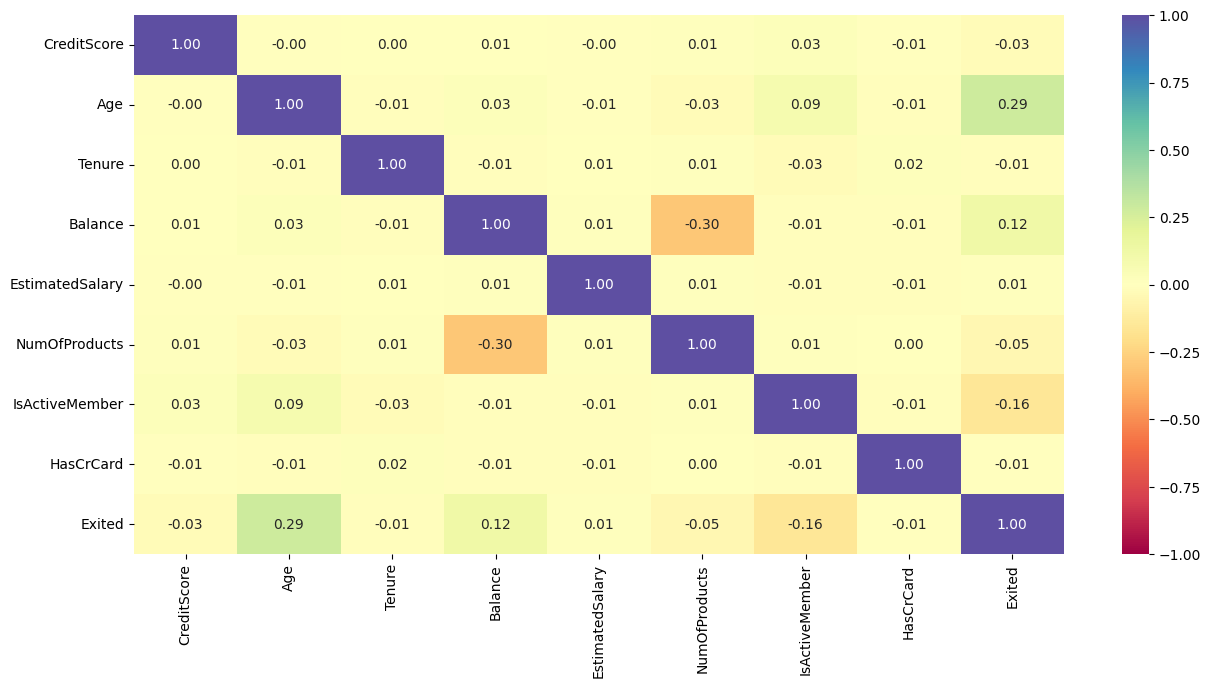

In [ ]:
# defining the list of numerical columns
cols_list = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary", "NumOfProducts", "IsActiveMember", "HasCrCard", "Exited"]
plt.figure(figsize=(15, 7))
sns.heatmap(df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

The correlation between 'Age' and 'Exited' is moderately positive, that means the older customers are slightly more likely to churn.
Balance has weak correlation with customer churn.
There is a negative correlation with is an active member,has card, num of products,credit score and tenure that needs to be analyzed.

Geography  France  Germany  Spain    All
Exited                                  
All          5014     2509   2477  10000
0            4204     1695   2064   7963
1             810      814    413   2037
------------------------------------------------------------------------------------------------------------------------


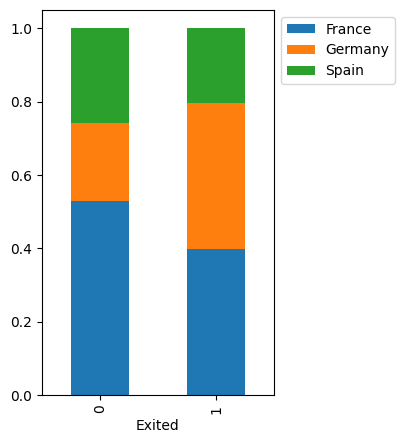

In [ ]:
stacked_barplot(df, "Exited","Geography" )

Customers are Germany have higher churn as compared to those from France and Spain. This could be related to the market related factors affecting customers churning.

Gender  Female  Male    All
Exited                     
All       4543  5457  10000
0         3404  4559   7963
1         1139   898   2037
------------------------------------------------------------------------------------------------------------------------


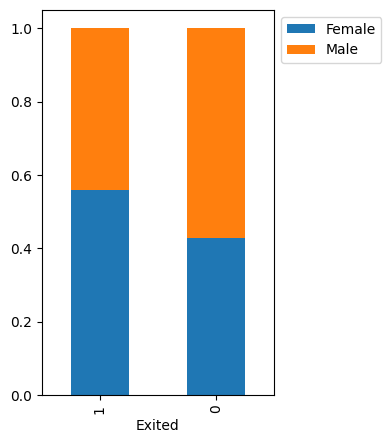

In [ ]:
stacked_barplot(df, "Exited", "Gender" )

Even though there are more male customers. Number of females churning is more than male.

HasCrCard     0     1    All
Exited                      
All        2945  7055  10000
0          2332  5631   7963
1           613  1424   2037
------------------------------------------------------------------------------------------------------------------------


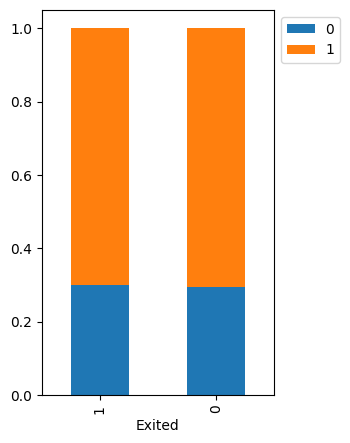

In [ ]:
stacked_barplot(df, "Exited", "HasCrCard"  )

Customers have credit cards have a very slight impact on customers churning.

IsActiveMember     0     1    All
Exited                           
All             4849  5151  10000
0               3547  4416   7963
1               1302   735   2037
------------------------------------------------------------------------------------------------------------------------


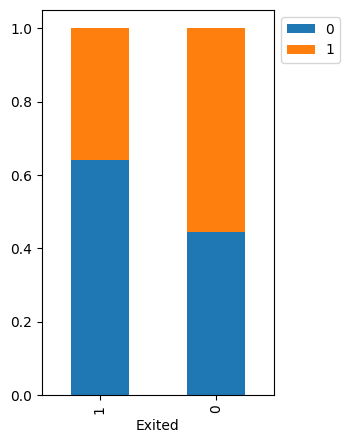

In [ ]:
stacked_barplot(df, "Exited","IsActiveMember" )

Customers who are not very active are more likely to churn as compared to who are active. More investigation should be done to find the reason the customers are not active


<Axes: xlabel='Exited', ylabel='CreditScore'>

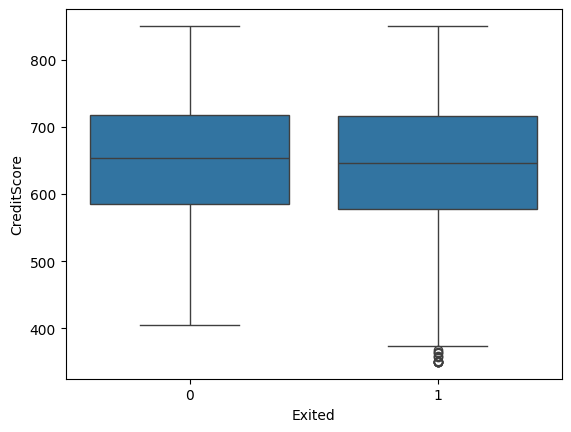

In [ ]:

sns.boxplot(data=df, y='CreditScore',x='Exited')

There is not much impact on the credit score and the customer churning

<Axes: xlabel='Exited', ylabel='Age'>

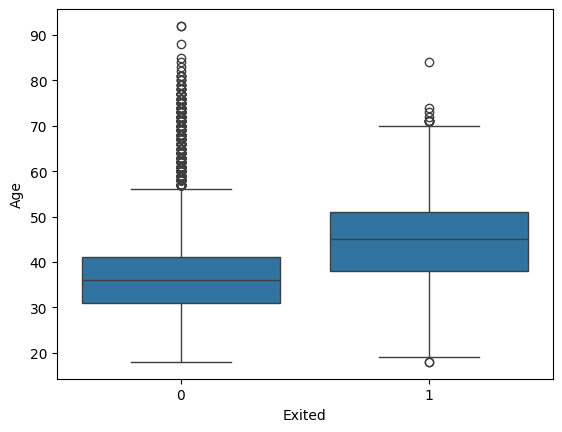

In [ ]:
sns.boxplot(data=df,y='Age',x='Exited')

Old customers are more likely to churn as compared to the new one. More analysis should be done on how to make the platform user friendly for the old generation

<Axes: xlabel='Exited', ylabel='Tenure'>

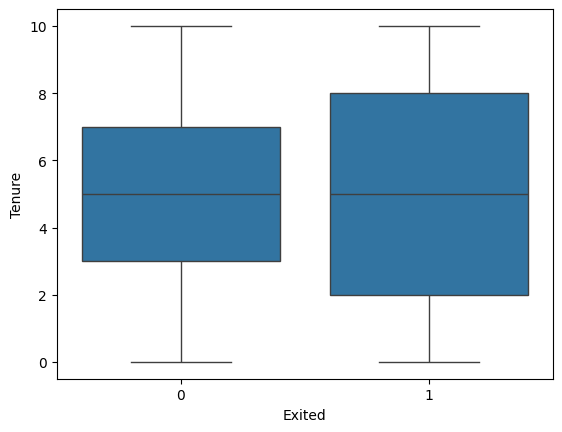

In [ ]:
sns.boxplot(data=df,y='Tenure',x='Exited')

There is not much impact on the tenure to customer churning

<Axes: xlabel='Exited', ylabel='Balance'>

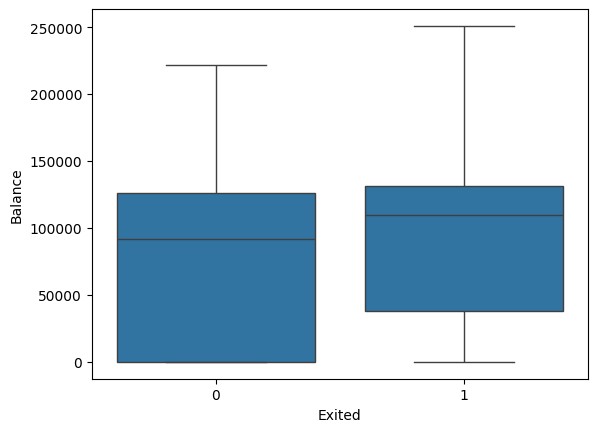

In [ ]:
sns.boxplot(data=df,y='Balance',x='Exited')

A slightly higher balance customers are churning. Analysis needs to be done to figure out if these customers are leaving because they want more grow their amount if yes how we can include that in the platform.

<Axes: xlabel='Exited', ylabel='NumOfProducts'>

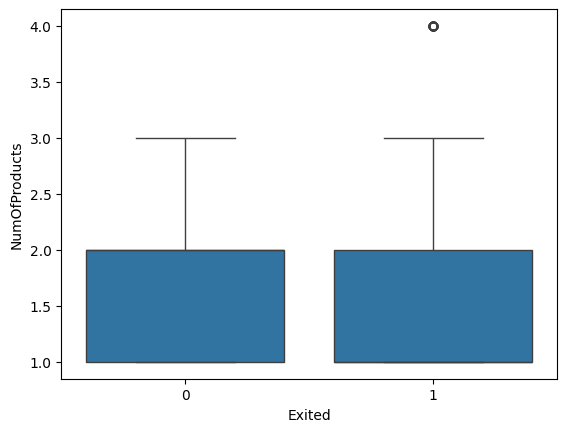

In [ ]:
sns.boxplot(data=df,y='NumOfProducts',x='Exited')

There is not much impact on number of products to customer churning

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

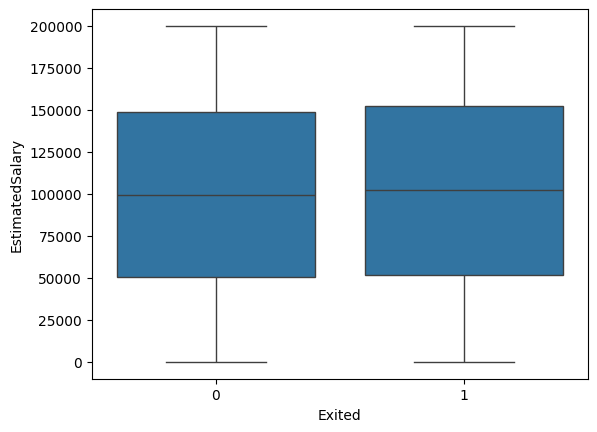

In [ ]:
sns.boxplot(data=df,y='EstimatedSalary',x='Exited')

There is not much impact on estimated salary to customer churning

## Data Preprocessing

### Dummy Variable Creation

In [ ]:
df = pd.get_dummies(df,columns=df.select_dtypes(include=["object"]).columns.tolist(),drop_first=True)
df = df.astype(float)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,0.0,0.0,0.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,1.0,0.0


### Train-validation-test Split

In [ ]:
X = df.drop(['Exited'],axis=1)
y = df['Exited']

In [ ]:
# first we split data into 2 parts, say temporary and test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.5, random_state=0, stratify=y
)

# then we split the temporary set into train and validation
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.4, random_state=0, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)

(5000, 11) (3000, 11) (2000, 11)


In [ ]:
# Checking class balance for whole data, train set, validation set, and test set

print("Target value ratio in y")
print(y.value_counts(1))
print("*" * 50)
print("Target value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 50)
print("Target value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 50)
print("Target value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 50)


# Making a list of all catrgorical variables
cat_col = list(df.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 50)

Target value ratio in y
Exited
0.0    0.7963
1.0    0.2037
Name: proportion, dtype: float64
**************************************************
Target value ratio in y_train
Exited
0.0    0.7962
1.0    0.2038
Name: proportion, dtype: float64
**************************************************
Target value ratio in y_val
Exited
0.0    0.796333
1.0    0.203667
Name: proportion, dtype: float64
**************************************************
Target value ratio in y_test
Exited
0.0    0.7965
1.0    0.2035
Name: proportion, dtype: float64
**************************************************


### Data Normalization

In [ ]:
# creating an instance of the standard scaler
sc = StandardScaler()
cols_list = X_train.columns
X_train[cols_list] = sc.fit_transform(X_train[cols_list])
X_val[cols_list] = sc.transform(X_val[cols_list])
X_test[cols_list] = sc.transform(X_test[cols_list])

## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

-


In [ ]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.2559658377292138, 1: 4.906771344455349}

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 32
batch_size = 64

### Basic Neural Network

In [ ]:
# Initializing the model
model = Sequential()
# Adding input layer with 64 neurons
model.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=[Recall()])

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.4297 - recall: 0.6723 - val_loss: 0.6493 - val_recall: 0.6923
Epoch 2/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2874 - recall: 0.7039 - val_loss: 0.6026 - val_recall: 0.7136
Epoch 3/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2254 - recall: 0.7029 - val_loss: 0.5808 - val_recall: 0.7267
Epoch 4/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1928 - recall: 0.7008 - val_loss: 0.5680 - val_recall: 0.7316
Epoch 5/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1729 - recall: 0.7157 - val_loss: 0.5592 - val_recall: 0.7300
Epoch 6/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.1587 - recall: 0.7133 - val_loss: 0.5523 - val_recall: 0.7300
Epoch 7/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1472 - recall: 0.7198 - val_loss: 0.5465 - val_recall: 0.7234
Epoch 8/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1370 - recall: 0.7137 - val_loss: 0.5412 - val_recall: 0.7283
Epoch 9/32
79/79 ━━━━━━━

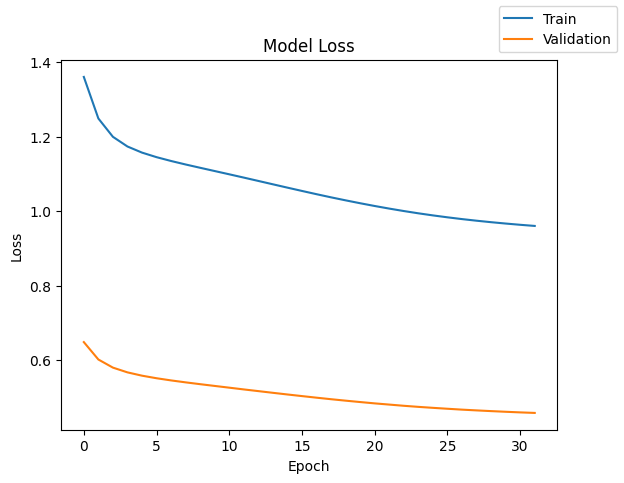

In [ ]:
plot(history,'loss')

In [ ]:
model_train_perf = model_performance_classification(model, X_train, y_train)
model_train_perf

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7842,0.7842,0.835764,0.799611


In [ ]:
model_val_perf = model_performance_classification(model, X_val, y_val)
model_val_perf

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.790333,0.790333,0.839237,0.804985


In [ ]:
y_train_pred = model.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [ ]:
y_val_pred = model.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.93      0.79      0.85      3981
         1.0       0.48      0.75      0.59      1019

    accuracy                           0.78      5000
   macro avg       0.70      0.77      0.72      5000
weighted avg       0.84      0.78      0.80      5000



In [ ]:
cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.93      0.80      0.86      2389
         1.0       0.49      0.76      0.60       611

    accuracy                           0.79      3000
   macro avg       0.71      0.78      0.73      3000
weighted avg       0.84      0.79      0.80      3000



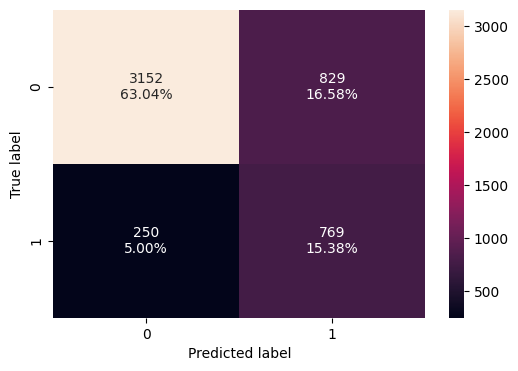

In [ ]:
make_confusion_matrix(y_train, y_train_pred)

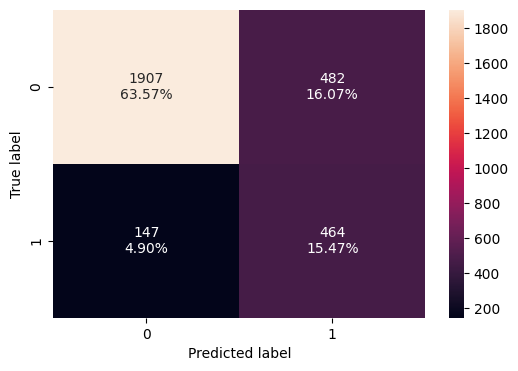

In [ ]:
make_confusion_matrix(y_val, y_val_pred)

### Neural Network with SGD Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:

# Initializing the model
model_0 = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model_0.add(Dense(32, activation='relu',kernel_initializer='he_uniform', input_dim = X_train.shape[1]))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_0.add(Dense(12, activation='relu',kernel_initializer='he_uniform'))
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_0.add(Dense(12, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model_0.add(Dense(1, activation='sigmoid'))

In [ ]:
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             396 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 12)                  │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 949 (3.71 KB)

 Trainable params: 949 (3.71 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.SGD(.001)    # defining SGD as the optimizer to be used
model_0.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=[Recall()])

In [ ]:
start = time.time()
history_0 = model_0.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.5472 - recall: 0.8808 - val_loss: 0.8497 - val_recall: 0.8020
Epoch 2/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4879 - recall: 0.7875 - val_loss: 0.7942 - val_recall: 0.7447
Epoch 3/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4548 - recall: 0.7475 - val_loss: 0.7602 - val_recall: 0.7103
Epoch 4/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4322 - recall: 0.7284 - val_loss: 0.7382 - val_recall: 0.7054
Epoch 5/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4150 - recall: 0.7232 - val_loss: 0.7223 - val_recall: 0.6989
Epoch 6/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4007 - recall: 0.7127 - val_loss: 0.7103 - val_recall: 0.7005
Epoch 7/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3886 - recall: 0.7236 - val_loss: 0.7009 - val_recall: 0.6972
Epoch 8/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3780 - recall: 0.7287 - val_loss: 0.6929 - val_recall: 0.7103
Epoch 9/32
79/79 ━━━━━━━

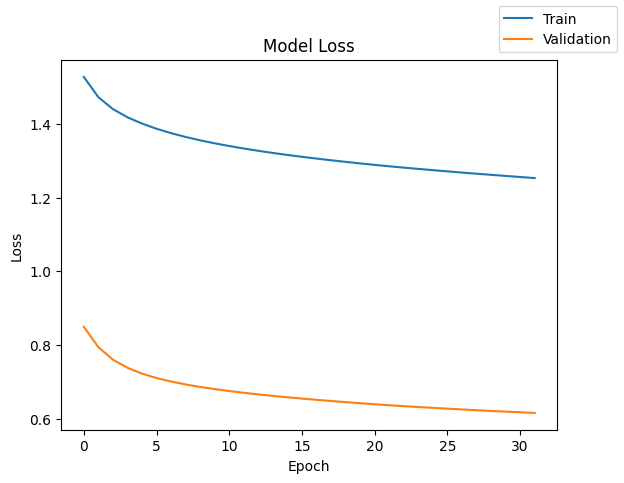

In [ ]:
plot(history_0,'loss')

In [ ]:
model_0_train_perf = model_performance_classification(model_0, X_train, y_train)
model_0_train_perf

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.6346,0.6346,0.780469,0.670071


In [ ]:
model_0_val_perf = model_performance_classification(model_0, X_val, y_val)
model_0_val_perf

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.646667,0.646667,0.786617,0.680915


In [ ]:
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_0.predict(X_val)
y_val_pred

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.90      0.61      0.73      3981
         1.0       0.32      0.73      0.45      1019

    accuracy                           0.63      5000
   macro avg       0.61      0.67      0.59      5000
weighted avg       0.78      0.63      0.67      5000



In [ ]:
cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.90      0.62      0.74      2389
         1.0       0.33      0.74      0.46       611

    accuracy                           0.65      3000
   macro avg       0.62      0.68      0.60      3000
weighted avg       0.79      0.65      0.68      3000



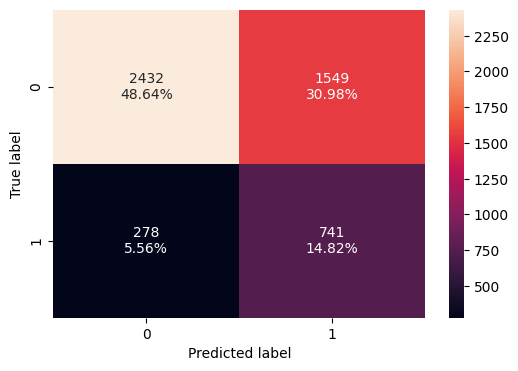

In [ ]:
make_confusion_matrix(y_train, y_train_pred)

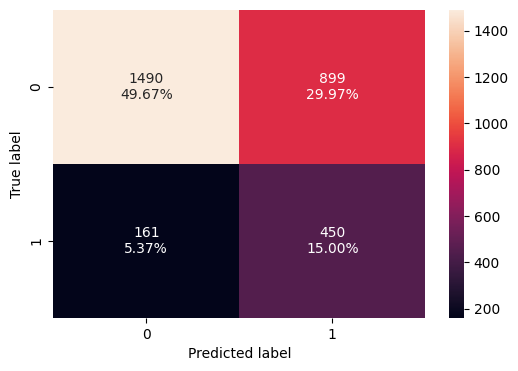

In [ ]:
make_confusion_matrix(y_val, y_val_pred)

In [ ]:

# Initializing the model
model_1 = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model_1.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_dim = X_train.shape[1]))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_1.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_1.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model_1.add(Dense(1, activation='sigmoid'))

In [ ]:
optimizer = tf.keras.optimizers.SGD(.01)    # defining SGD as the optimizer to be used
model_1.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=[Recall()])

In [ ]:
start = time.time()
history = model_1.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.4964 - recall_1: 0.6840 - val_loss: 0.5946 - val_recall_1: 0.6547
Epoch 2/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.2473 - recall_1: 0.7069 - val_loss: 0.5375 - val_recall_1: 0.6465
Epoch 3/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1747 - recall_1: 0.7014 - val_loss: 0.5135 - val_recall_1: 0.6481
Epoch 4/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1368 - recall_1: 0.7162 - val_loss: 0.5010 - val_recall_1: 0.6563
Epoch 5/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1087 - recall_1: 0.7288 - val_loss: 0.4929 - val_recall_1: 0.6678
Epoch 6/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0857 - recall_1: 0.7376 - val_loss: 0.4857 - val_recall_1: 0.6825
Epoch 7/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0656 - recall_1: 0.7494 - val_loss: 0.4784 - val_recall_1: 0.6923
Epoch 8/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0480 - recall_1: 0.7532 - val_loss: 0.4734 - val_recall_1

In [ ]:
model_1_train_perf = model_performance_classification(model_1, X_train, y_train)
model_1_train_perf

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8224,0.8224,0.852011,0.832016


In [ ]:
model_1_val_perf = model_performance_classification(model_1, X_val, y_val)
model_1_val_perf

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.809333,0.809333,0.837738,0.819139


In [ ]:
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [ ]:
y_val_pred = model_1.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.93      0.84      0.88      3981
         1.0       0.55      0.75      0.63      1019

    accuracy                           0.82      5000
   macro avg       0.74      0.80      0.76      5000
weighted avg       0.85      0.82      0.83      5000



In [ ]:
cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.92      0.84      0.87      2389
         1.0       0.52      0.71      0.60       611

    accuracy                           0.81      3000
   macro avg       0.72      0.77      0.74      3000
weighted avg       0.84      0.81      0.82      3000



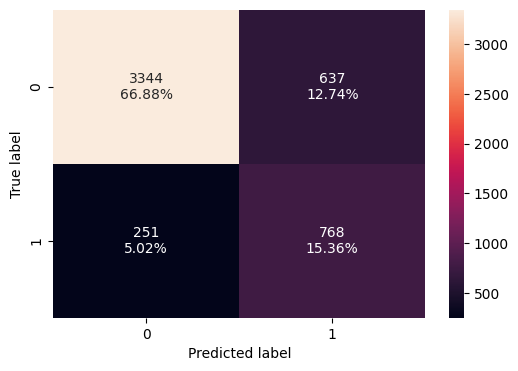

In [ ]:
make_confusion_matrix(y_train, y_train_pred)

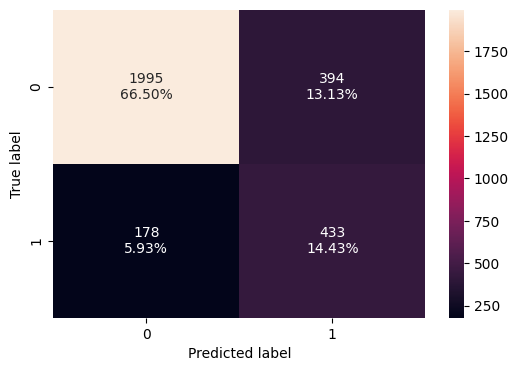

In [ ]:
make_confusion_matrix(y_val, y_val_pred)

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:

# Initializing the model
model_2 = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model_2.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_dim = X_train.shape[1]))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_2.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_2.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model_2.add(Dense(1, activation='sigmoid'))

In [ ]:
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,937 (15.38 KB)

 Trainable params: 3,937 (15.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.SGD(momentum=0.9)    # defining SGD as the optimizer to be used
model_2.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=[Recall()])

In [ ]:
start = time.time()
history = model_2.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight = cw_dict)
end=time.time()

Epoch 1/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.4756 - recall: 0.5731 - val_loss: 0.6125 - val_recall: 0.8036
Epoch 2/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1549 - recall: 0.7339 - val_loss: 0.5431 - val_recall: 0.7954
Epoch 3/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0605 - recall: 0.7677 - val_loss: 0.4581 - val_recall: 0.7578
Epoch 4/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9835 - recall: 0.7767 - val_loss: 0.4283 - val_recall: 0.7021
Epoch 5/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9353 - recall: 0.7682 - val_loss: 0.4179 - val_recall: 0.6825
Epoch 6/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9041 - recall: 0.7587 - val_loss: 0.4117 - val_recall: 0.6579
Epoch 7/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8817 - recall: 0.7759 - val_loss: 0.4113 - val_recall: 0.6661
Epoch 8/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8580 - recall: 0.7810 - val_loss: 0.4153 - val_recall: 0.6334
Epoch 9/32
79/79 ━━━━━━━

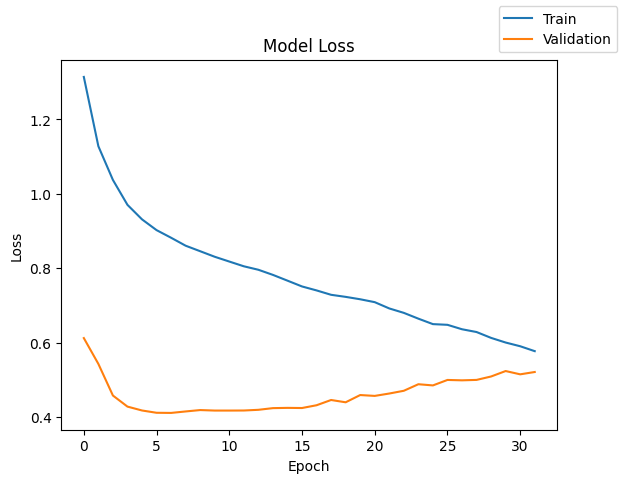

In [ ]:
plot(history,'loss')

In [ ]:
model_2_train_perf = model_performance_classification(model_2, X_train, y_train)
model_2_train_perf

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8804,0.8804,0.894355,0.884903


In [ ]:
model_2_val_perf = model_performance_classification(model_2, X_val, y_val)
model_2_val_perf

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.799,0.799,0.814934,0.805535


In [ ]:
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [ ]:
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92      3981
         1.0       0.67      0.83      0.74      1019

    accuracy                           0.88      5000
   macro avg       0.81      0.86      0.83      5000
weighted avg       0.89      0.88      0.88      5000



In [ ]:
cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87      2389
         1.0       0.51      0.61      0.55       611

    accuracy                           0.80      3000
   macro avg       0.70      0.73      0.71      3000
weighted avg       0.81      0.80      0.81      3000



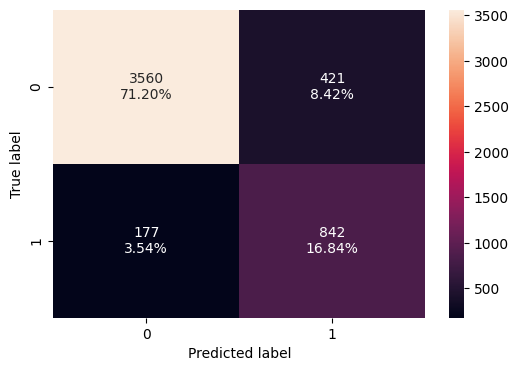

In [ ]:
make_confusion_matrix(y_train, y_train_pred)

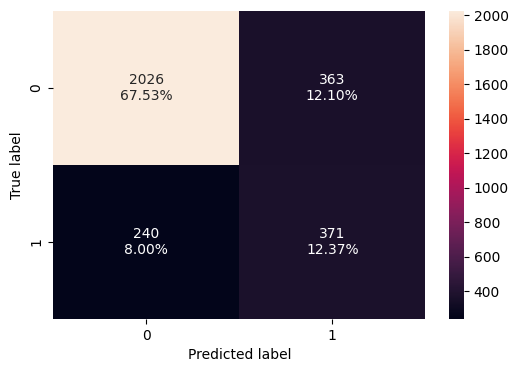

In [ ]:
make_confusion_matrix(y_val, y_val_pred)

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:

# Initializing the model
model_3 = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model_3.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_dim = X_train.shape[1]))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_3.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_3.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model_3.add(Dense(1, activation='sigmoid'))

In [ ]:
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,937 (15.38 KB)

 Trainable params: 3,937 (15.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam(.0001)    # defining SGD as the optimizer to be used
model_3.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=[Recall()])

In [ ]:
start = time.time()
history = model_3.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.4480 - recall: 0.3496 - val_loss: 0.6119 - val_recall: 0.5630
Epoch 2/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3296 - recall: 0.5669 - val_loss: 0.6258 - val_recall: 0.6596
Epoch 3/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2824 - recall: 0.6225 - val_loss: 0.6200 - val_recall: 0.6792
Epoch 4/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2537 - recall: 0.6534 - val_loss: 0.6113 - val_recall: 0.6972
Epoch 5/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2321 - recall: 0.6561 - val_loss: 0.6025 - val_recall: 0.6972
Epoch 6/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2147 - recall: 0.6679 - val_loss: 0.5944 - val_recall: 0.6874
Epoch 7/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2004 - recall: 0.6699 - val_loss: 0.5873 - val_recall: 0.6776
Epoch 8/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1879 - recall: 0.6802 - val_loss: 0.5808 - val_recall: 0.6759
Epoch 9/32
79/79 ━━━━━━━

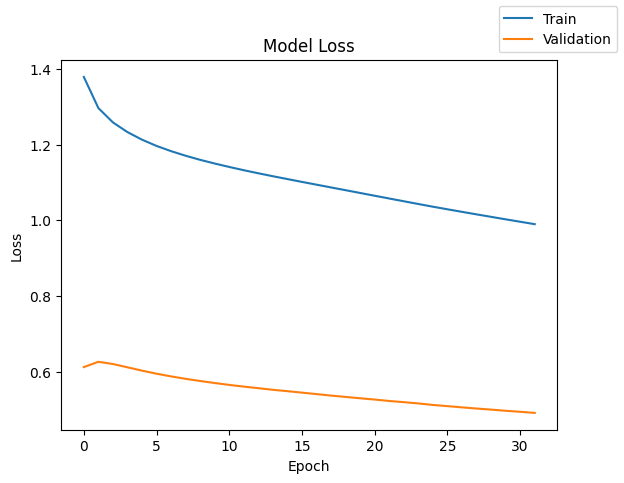

In [ ]:
plot(history,'loss')

In [ ]:
model_3_train_perf = model_performance_classification(model_3, X_train, y_train)
model_3_train_perf

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7842,0.7842,0.83152,0.798898


In [ ]:
model_3_val_perf = model_performance_classification(model_3, X_val, y_val)
model_3_val_perf

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.776333,0.776333,0.820911,0.790917


In [ ]:
y_train_pred = model_3.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [ ]:
y_val_pred = model_3.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [ ]:
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.92      0.80      0.85      3981
         1.0       0.48      0.73      0.58      1019

    accuracy                           0.78      5000
   macro avg       0.70      0.77      0.72      5000
weighted avg       0.83      0.78      0.80      5000



In [ ]:
cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.91      0.80      0.85      2389
         1.0       0.47      0.70      0.56       611

    accuracy                           0.78      3000
   macro avg       0.69      0.75      0.70      3000
weighted avg       0.82      0.78      0.79      3000



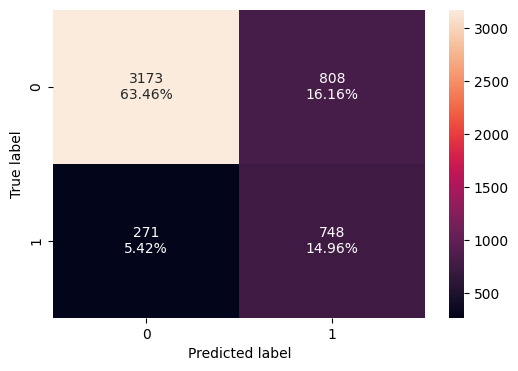

In [ ]:
make_confusion_matrix(y_train, y_train_pred)

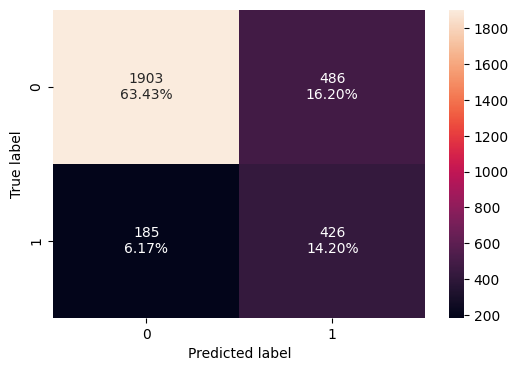

In [ ]:
make_confusion_matrix(y_val, y_val_pred)

### Neural Network with Adam Optimizer and Dropout

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:

# Initializing the model
model_4= Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model_4.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_dim = X_train.shape[1]))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_4.add(Dropout(0.4))
model_4.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model_4.add(Dropout(0.2))
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_4.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model_4.add(Dropout(0.2))
# Adding the output layer with one neuron and linear as activation
model_4.add(Dense(1, activation='sigmoid'))

In [ ]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,937 (15.38 KB)

 Trainable params: 3,937 (15.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam(.001)    # defining Adam as the optimizer to be used and using the learning rate
model_4.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=[Recall()])

In [ ]:
start = time.time()
history = model_4.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 0.9377 - recall_1: 0.7631 - val_loss: 0.4125 - val_recall_1: 0.6678
Epoch 2/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.9397 - recall_1: 0.7309 - val_loss: 0.4133 - val_recall_1: 0.6743
Epoch 3/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.9353 - recall_1: 0.7551 - val_loss: 0.4135 - val_recall_1: 0.6809
Epoch 4/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.9441 - recall_1: 0.7497 - val_loss: 0.4096 - val_recall_1: 0.6858
Epoch 5/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.9308 - recall_1: 0.7480 - val_loss: 0.4148 - val_recall_1: 0.6809
Epoch 6/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.9116 - recall_1: 0.7549 - val_loss: 0.4116 - val_recall_1: 0.6890
Epoch 7/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.9187 - recall_1: 0.7445 - val_loss: 0.4108 - val_recall_1: 0.6939
Epoch 8/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.9089 - recall_1: 0.7537 - val_loss: 0.4124 - val_r

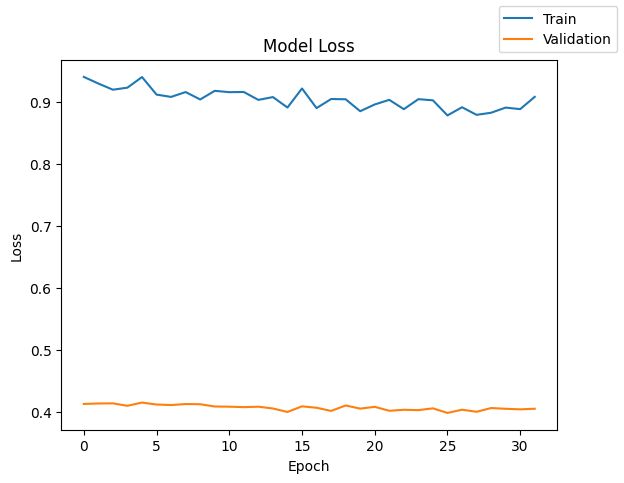

In [ ]:
plot(history,'loss')

In [ ]:
model_4_train_perf = model_performance_classification(model_4, X_train, y_train)
model_4_train_perf

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8454,0.8454,0.862584,0.851478


In [ ]:
model_4_val_perf = model_performance_classification(model_4, X_val, y_val)
model_4_val_perf

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.827667,0.827667,0.84326,0.833657


In [ ]:
y_train_pred = model_4.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [ ]:
y_val_pred = model_4.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90      3981
         1.0       0.60      0.75      0.66      1019

    accuracy                           0.85      5000
   macro avg       0.76      0.81      0.78      5000
weighted avg       0.86      0.85      0.85      5000



In [ ]:
cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.91      0.86      0.89      2389
         1.0       0.56      0.69      0.62       611

    accuracy                           0.83      3000
   macro avg       0.74      0.77      0.75      3000
weighted avg       0.84      0.83      0.83      3000



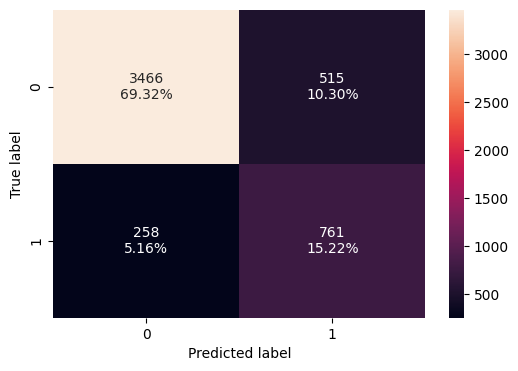

In [ ]:
make_confusion_matrix(y_train, y_train_pred)

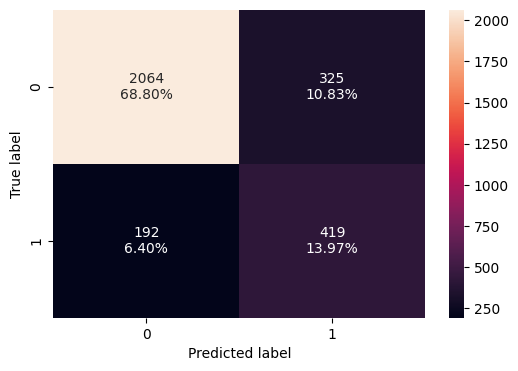

In [ ]:
make_confusion_matrix(y_val, y_val_pred)

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [ ]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of label '1': 1019
Before OverSampling, count of label '0': 3981 

After OverSampling, count of label '1': 3981
After OverSampling, count of label '0': 3981 

After OverSampling, the shape of train_X: (7962, 11)
After OverSampling, the shape of train_y: (7962,) 



In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:

# Initializing the model
model_5 = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model_5.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_dim = X_train.shape[1]))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_5.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_5.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model_5.add(Dense(1, activation='sigmoid'))

In [ ]:
optimizer = tf.keras.optimizers.SGD(.01)    # defining SGD as the optimizer to be used
model_5.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=[Recall()])

In [ ]:
start = time.time()
history = model_3.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/32
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2623 - recall: 0.8624 - val_loss: 0.8499 - val_recall: 0.9476
Epoch 2/32
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0944 - recall: 0.9595 - val_loss: 0.8405 - val_recall: 0.9493
Epoch 3/32
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0779 - recall: 0.9584 - val_loss: 0.8335 - val_recall: 0.9476
Epoch 4/32
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0643 - recall: 0.9589 - val_loss: 0.8263 - val_recall: 0.9460
Epoch 5/32
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0524 - recall: 0.9590 - val_loss: 0.8205 - val_recall: 0.9427
Epoch 6/32
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0416 - recall: 0.9584 - val_loss: 0.8145 - val_recall: 0.9411
Epoch 7/32
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0315 - recall: 0.9594 - val_loss: 0.8091 - val_recall: 0.9378
Epoch 8/32
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0222 - recall: 0.9594 - val_loss: 0.8031 - val_recall: 0.9313
Epoch 9/

In [ ]:
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,937 (15.38 KB)

 Trainable params: 3,937 (15.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_5_train_perf = model_performance_classification(model_5, X_train_over, y_train_over)
model_5_train_perf

249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.563803,0.563803,0.590528,0.529046


In [ ]:
model_5_val_perf = model_performance_classification(model_5, X_val, y_val)
model_5_val_perf

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.736333,0.736333,0.728695,0.732344


In [ ]:
y_train_pred = model_5.predict(X_train_over)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
y_val_pred = model_5.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
cr = classification_report(y_train_over, y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.54      0.84      0.66      3981
         1.0       0.64      0.29      0.40      3981

    accuracy                           0.56      7962
   macro avg       0.59      0.56      0.53      7962
weighted avg       0.59      0.56      0.53      7962



In [ ]:
cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84      2389
         1.0       0.34      0.31      0.33       611

    accuracy                           0.74      3000
   macro avg       0.58      0.58      0.58      3000
weighted avg       0.73      0.74      0.73      3000



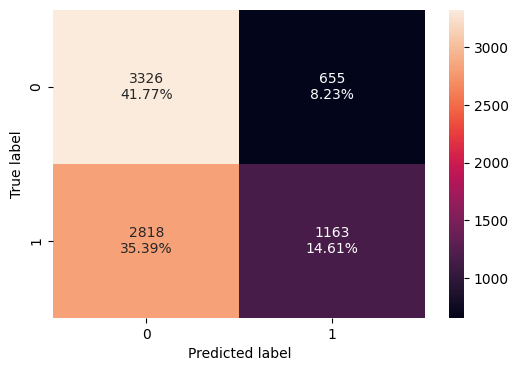

In [ ]:
make_confusion_matrix(y_train_over, y_train_pred)

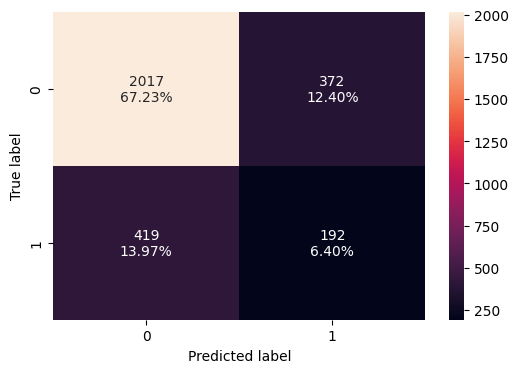

In [ ]:
make_confusion_matrix(y_val, y_val_pred)

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:

# Initializing the model
model_6 = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model_6.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_dim = X_train.shape[1]))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_6.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_6.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model_6.add(Dense(1, activation='sigmoid'))

In [ ]:
optimizer = tf.keras.optimizers.Adam(.01)    # defining SGD as the optimizer to be used
model_6.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=[Recall()])

In [ ]:
start = time.time()
history = model_6.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/32
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.3841 - recall: 0.9423 - val_loss: 0.7817 - val_recall: 0.9231
Epoch 2/32
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9964 - recall: 0.9502 - val_loss: 0.7267 - val_recall: 0.8985
Epoch 3/32
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9381 - recall: 0.9544 - val_loss: 0.7678 - val_recall: 0.9018
Epoch 4/32
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8762 - recall: 0.9588 - val_loss: 0.7525 - val_recall: 0.8789
Epoch 5/32
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8589 - recall: 0.9600 - val_loss: 0.7535 - val_recall: 0.8887
Epoch 6/32
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8167 - recall: 0.9644 - val_loss: 0.7864 - val_recall: 0.8789
Epoch 7/32
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8000 - recall: 0.9698 - val_loss: 0.8165 - val_recall: 0.8805
Epoch 8/32
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7606 - recall: 0.9706 - val_loss: 0.7467 - val_recall: 0.8494
Epoch 9/

In [ ]:
model_6_train_perf = model_performance_classification(model_6, X_train_over, y_train_over)
model_6_train_perf

249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.891861,0.891861,0.90346,0.891078


In [ ]:
model_6_val_perf = model_performance_classification(model_6, X_val, y_val)
model_6_val_perf

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.737333,0.737333,0.813261,0.759214


In [ ]:
y_train_pred = model_6.predict(X_train_over)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_6.predict(X_val)
y_val_pred

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [ ]:
cr = classification_report(y_train_over, y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.97      0.81      0.88      3981
         1.0       0.84      0.98      0.90      3981

    accuracy                           0.89      7962
   macro avg       0.90      0.89      0.89      7962
weighted avg       0.90      0.89      0.89      7962



In [ ]:
cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.91      0.74      0.82      2389
         1.0       0.42      0.73      0.53       611

    accuracy                           0.74      3000
   macro avg       0.67      0.73      0.67      3000
weighted avg       0.81      0.74      0.76      3000



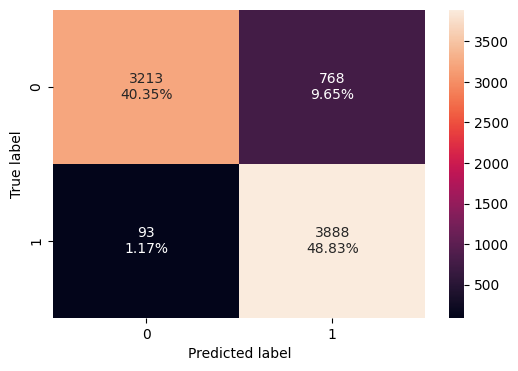

In [ ]:
make_confusion_matrix(y_train_over, y_train_pred)

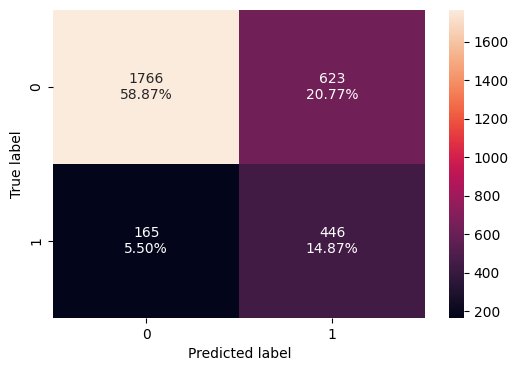

In [ ]:
make_confusion_matrix(y_val, y_val_pred)

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [ ]:

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:

# Initializing the model
model_7 = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model_7.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_dim = X_train.shape[1]))
model_7.add(Dropout(0.4))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_7.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model_7.add(Dropout(0.2))
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_7.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model_7.add(Dropout(0.2))
# Adding the output layer with one neuron and linear as activation
model_7.add(Dense(1, activation='sigmoid'))


In [ ]:
optimizer = tf.keras.optimizers.Adam(.001)    # defining SGD as the optimizer to be used
model_7.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=[Recall()])

In [ ]:
start = time.time()
history = model_7.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/32
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2.0002 - recall: 0.8535 - val_loss: 0.9357 - val_recall: 0.9804
Epoch 2/32
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4767 - recall: 0.9489 - val_loss: 0.9076 - val_recall: 0.9755
Epoch 3/32
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4289 - recall: 0.9659 - val_loss: 0.8854 - val_recall: 0.9656
Epoch 4/32
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3793 - recall: 0.9676 - val_loss: 0.8594 - val_recall: 0.9673
Epoch 5/32
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3671 - recall: 0.9637 - val_loss: 0.8771 - val_recall: 0.9755
Epoch 6/32
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3251 - recall: 0.9700 - val_loss: 0.8419 - val_recall: 0.9624
Epoch 7/32
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.2891 - recall: 0.9608 - val_loss: 0.8230 - val_recall: 0.9542
Epoch 8/32
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2646 - recall: 0.9594 - val_loss: 0.8206 - val_recall: 0.9525
Epoch 9/

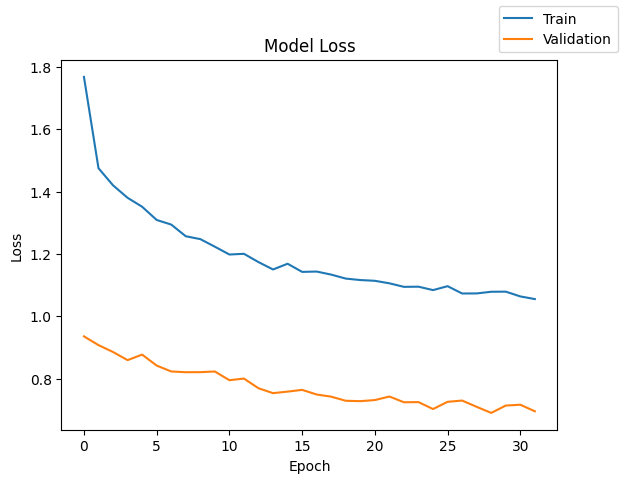

In [ ]:
plot(history,'loss')

In [ ]:
model_7_train_perf = model_performance_classification(model_7, X_train_over, y_train_over)
model_7_train_perf

249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.751696,0.751696,0.803368,0.740652


In [ ]:
model_7_val_perf = model_performance_classification(model_7, X_val, y_val)
model_7_val_perf

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.634,0.634,0.83872,0.667952


In [ ]:
y_train_pred = model_7.predict(X_train_over)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_7.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
cr = classification_report(y_train_over, y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.93      0.55      0.69      3981
         1.0       0.68      0.96      0.79      3981

    accuracy                           0.75      7962
   macro avg       0.80      0.75      0.74      7962
weighted avg       0.80      0.75      0.74      7962



In [ ]:
cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.96      0.56      0.71      2389
         1.0       0.35      0.92      0.51       611

    accuracy                           0.63      3000
   macro avg       0.66      0.74      0.61      3000
weighted avg       0.84      0.63      0.67      3000



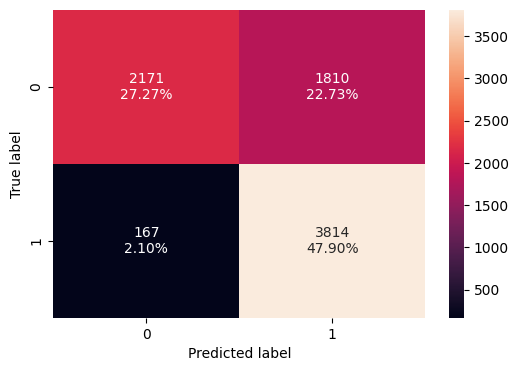

In [ ]:
make_confusion_matrix(y_train_over, y_train_pred)

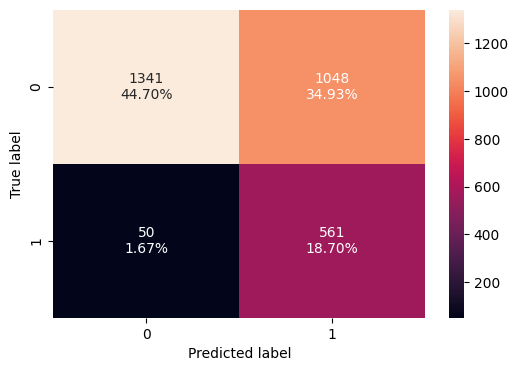

In [ ]:
make_confusion_matrix(y_val, y_val_pred)

## Model Performance Comparison and Final Model Selection

In [ ]:

# Assuming you have model_0_train_perf, model_1_train_perf, etc.

# Create lists of model performance DataFrames and model names
train_perfs = [model_train_perf, model_0_train_perf, model_1_train_perf, model_2_train_perf,
               model_3_train_perf, model_4_train_perf, model_5_train_perf,
               model_6_train_perf, model_7_train_perf]
val_perfs = [model_val_perf,model_0_val_perf, model_1_val_perf, model_2_val_perf,
             model_3_val_perf, model_4_val_perf, model_5_val_perf,
             model_6_val_perf, model_7_val_perf]
model_names = ["Neural Network basic with SGD Optimizer",
    "Neural Network with SGD Optimizer",
              "Neural Network with SGD Optimizer- hyper parameter update",
              "Neural Network with SGD Optimizer - Momentum",
              "Neural Network with Adam Optimizer",
              "Neural Network with Adam Optimizer - Dropout",
              "Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer",
              "Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer",
              "Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout"]

# Extract recall scores for training and validation
train_recalls = [df['Recall'][0] for df in train_perfs]  # Extract recall values
val_recalls = [df['Recall'][0] for df in val_perfs]

# Create DataFrames for recall comparison
all_train_recall = pd.DataFrame({'Model': model_names, 'Train Recall': train_recalls})
all_val_recall = pd.DataFrame({'Model': model_names, 'Validation Recall': val_recalls})

# Display the recall comparison DataFrames
print("Training Recall Comparison:")
print(all_train_recall)
print("\nValidation Recall Comparison:")
print(all_val_recall)

Training Recall Comparison:
                                               Model  Train Recall
0            Neural Network basic with SGD Optimizer      0.784200
1                  Neural Network with SGD Optimizer      0.634600
2  Neural Network with SGD Optimizer- hyper param...      0.822400
3       Neural Network with SGD Optimizer - Momentum      0.880400
4                 Neural Network with Adam Optimizer      0.784200
5       Neural Network with Adam Optimizer - Dropout      0.845400
6  Neural Network with Balanced Data (by applying...      0.563803
7  Neural Network with Balanced Data (by applying...      0.891861
8  Neural Network with Balanced Data (by applying...      0.751696

Validation Recall Comparison:
                                               Model  Validation Recall
0            Neural Network basic with SGD Optimizer           0.790333
1                  Neural Network with SGD Optimizer           0.646667
2  Neural Network with SGD Optimizer- hyper param...   

## Actionable Insights and Business Recommendations

**Model Selection**

"Neural Network with Adam Optimizer and Dropout" (model_4) appears to be a promising choice. It achieved high recall and accuracy.

In [ ]:
model_4_test_perf = model_performance_classification( model_4, X_test, y_test)
model_4_test_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8025,0.8025,0.819273,0.809263


In [ ]:
y_test_pred = model_4.predict(X_test)
y_test_pred = (y_test_pred > 0.5)
y_test_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [ ]:
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.90      0.85      0.87      1593
         1.0       0.51      0.62      0.56       407

    accuracy                           0.80      2000
   macro avg       0.70      0.74      0.72      2000
weighted avg       0.82      0.80      0.81      2000



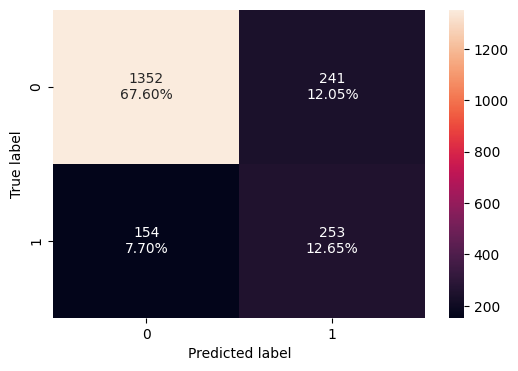

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

**Actionable Insights:**

Customer Churn Risk: Around 20% of customers have churned. Using our analysis we can see the factors that are contributing to customer churn and identify high risk customers and create startegies to see how we can retain these customers

Geography and Churn: Customers in Germany have a higher churn rate than those in France or Spain. Effort should me made to check the market factors like competition, econmic conditions and customer preference in Germany to come up with retention strategies.

Gender and Churn: Female customers exhibit a slightly higher churn rate than male customers. More investigation is needed to understand the pain points of female customers and how to improve their banking experience.

Customer Activity: Inactive customers are churning more than active ones, which is understandable. So, effort should be made to encourage customer enagement eith more personalized offers, rewards and targeted customers communication.

Customer Age: Older customers are slightly more likely to churn. Ensure that banking services are accessible and user-friendly for older customers.  Add more support and training programs for old customers.

**Business Recommendations:**

Targeted Retention Strategies: Develop targeted campaigns for at-risk customer segments (e.g., inactive customers, customers in Germany, female customers, and older customers) to reduce churn.

Enhance Customer Engagement: Focus on improving customer engagement through personalized offers, targeted communications, rewards programs, and proactive customer service.

Check regional differences to attract customers from different segment.

Invest in Customer Research: Conduct further research to understand the underlying reasons for customer churn, particularly among specific segments. This could involve surveys, focus groups, or analyzing customer feedback to gather valuable insights.

*

